In [2]:
import pygame

import pygame
import random
import time
# 게임 초기화
pygame.init()
screen_width, screen_height = 640, 480
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Snakegame by SJW')
clock = pygame.time.Clock()

# 색깔 정의
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
WHITE = (255, 255, 255)

# Snake 클래스 정의
class Snake:
    def __init__(self):
        self.x = 10
        self.y = 10
        self.direction = "RIGHT"
        self.body = [(self.x, self.y)]

    def move(self):
        if self.direction == "RIGHT":
            self.x += 10
        elif self.direction == "LEFT":
            self.x -= 10
        elif self.direction == "UP":
            self.y -= 10
        elif self.direction == "DOWN":
            self.y += 10

        self.body.insert(0, (self.x, self.y))
        self.body.pop()

    def change_direction(self, new_direction):
        if new_direction == "RIGHT" and self.direction != "LEFT":
            self.direction = new_direction
        elif new_direction == "LEFT" and self.direction != "RIGHT":
            self.direction = new_direction
        elif new_direction == "UP" and self.direction != "DOWN":
            self.direction = new_direction
        elif new_direction == "DOWN" and self.direction != "UP":
            self.direction = new_direction

    def draw(self):
        for segment in self.body:
            pygame.draw.rect(screen, GREEN, (segment[0], segment[1], 10, 10))

# Apple 클래스 정의
class Apple:
    def __init__(self):
        self.x = random.randrange(0, screen_width,10) 
        self.y = random.randrange(0, screen_height,10) 
        

    def draw(self):
        pygame.draw.rect(screen, RED, (self.x, self.y, 10, 10))

#Message 출력하는 함수
font_style = pygame.font.SysFont(None, 50)
def message(msg,color,x_size,y_szie):
    mesg = font_style.render(msg,True,color)
    screen.blit(mesg,[x_size,y_szie])


# 게임 루프
running = True
snake = Snake()
apple = Apple()
score = 0

#점수 표시
score_text = font_style.render(f'SCORE: {score}',True,WHITE) #True를 주면 안티엘라이싱 적용으로 매끄러워보임 
score_rect = score_text.get_rect()
score_rect.topleft= (10,10)

print(apple.x,apple.y)
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_RIGHT:
                snake.change_direction("RIGHT")
            elif event.key == pygame.K_LEFT:
                snake.change_direction("LEFT")
            elif event.key == pygame.K_UP:
                snake.change_direction("UP")
            elif event.key == pygame.K_DOWN:
                snake.change_direction("DOWN")

    snake.move()

    # 뱀이 벽에 부딪히는 경우 게임 종료
    if snake.x < 0 or snake.x > screen_width or snake.y < 0 or snake.y > screen_height:
        running = False

    #뱀이 꼬리를 밟으면 게임 종료
    for elements in snake.body[1:]:
        if snake.x == elements[0] and snake.y == elements[1]:
            running = False

    # 뱀이 사과를 먹으면 새로운 사과 생성
    if snake.x == apple.x and snake.y == apple.y:
        snake.body.append((apple.x, apple.y))
        #print('먹었다')
        score += 1
        apple = Apple()
        score_text = font_style.render("Score: " + str(score), True, WHITE)


        

    

    
    

    screen.fill(BLACK)
    snake.draw()
    apple.draw()
    screen.blit(score_text, score_rect)
    pygame.display.flip()
    clock.tick(10)

message('You Lose',RED,screen_width/2,screen_height/2)
pygame.display.update()
time.sleep(2)
pygame.quit()


430 160


# DQN 적용버전

Episode: 1  Score: 0


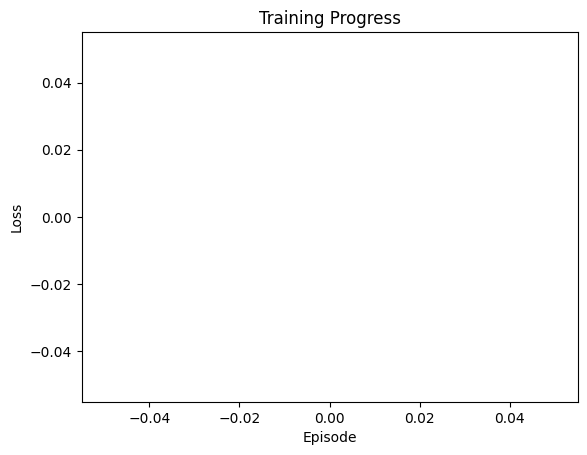

Episode: 2  Score: 0


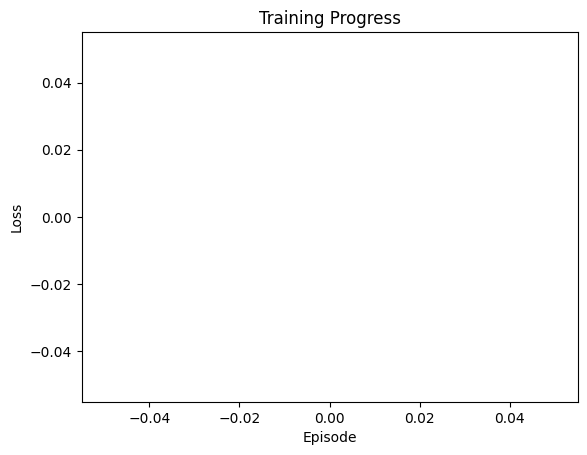

Episode: 3  Score: 0


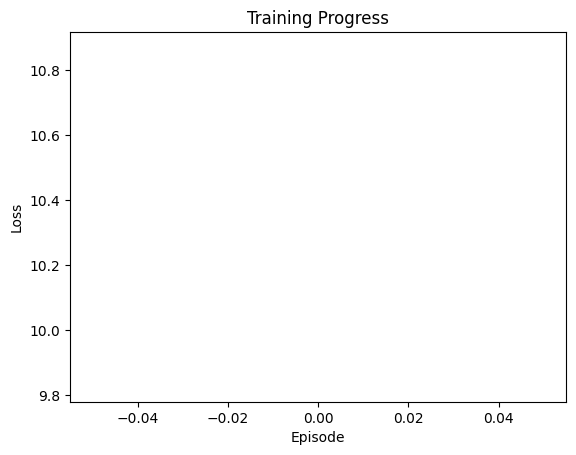

Episode: 4  Score: 0


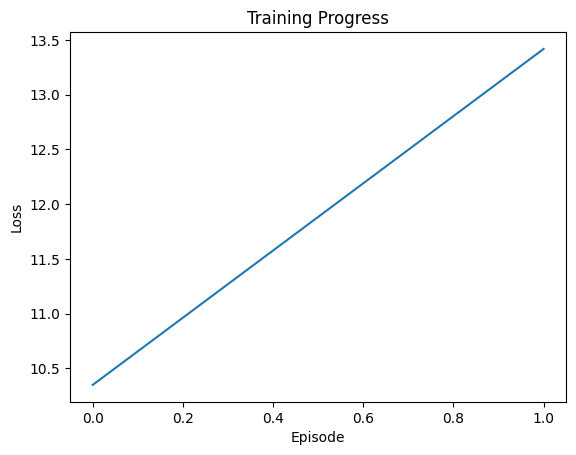

Episode: 5  Score: 0


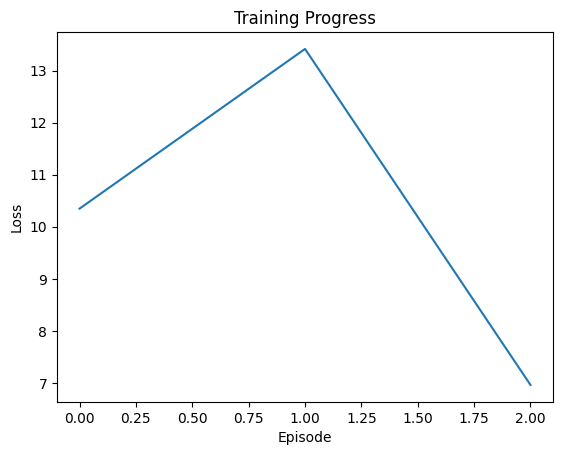

Episode: 6  Score: 0


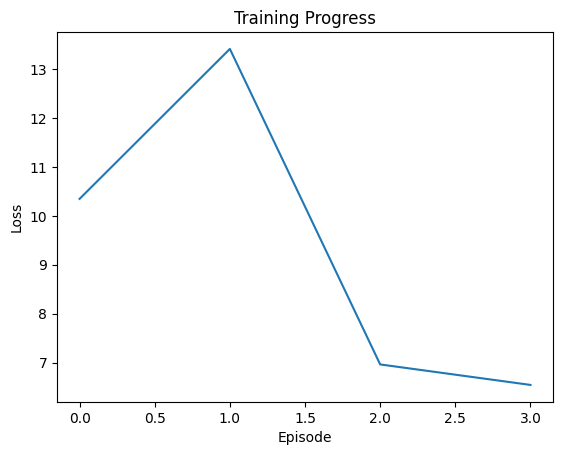

Episode: 7  Score: 0


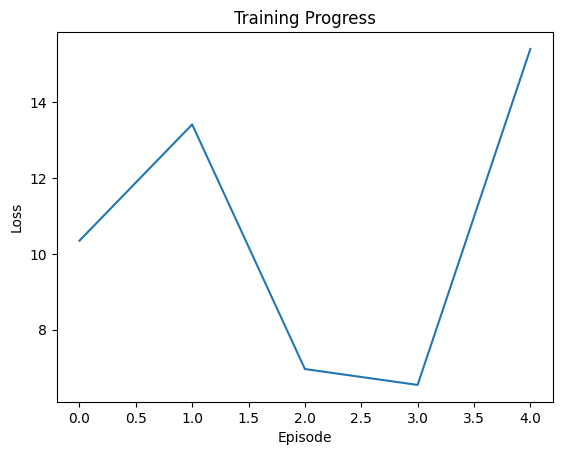

Episode: 8  Score: 0


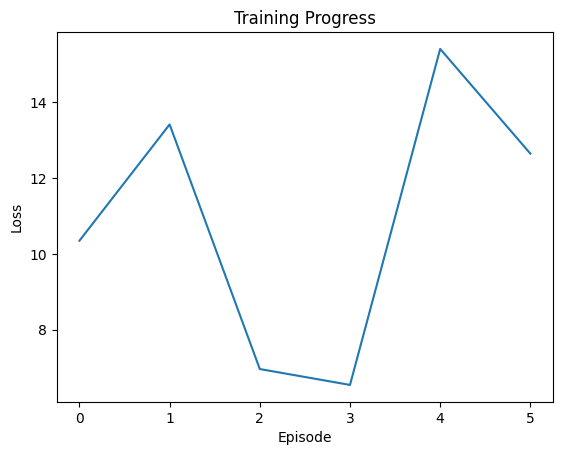

Episode: 9  Score: 0


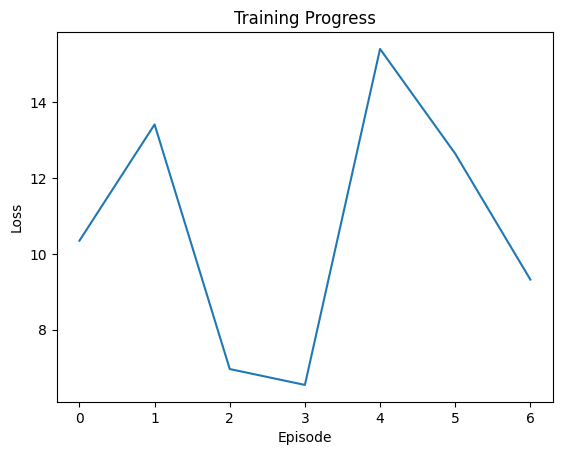

Episode: 10  Score: 0


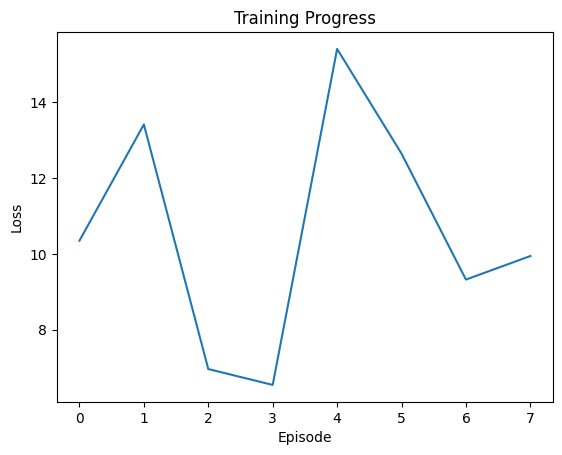

Episode: 11  Score: 0


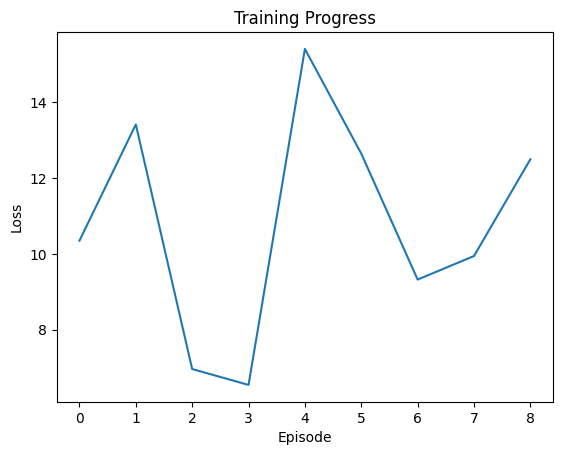

Episode: 12  Score: 0


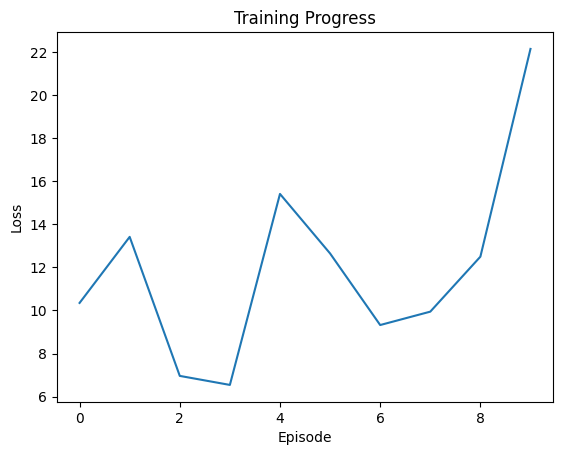

Episode: 13  Score: 0


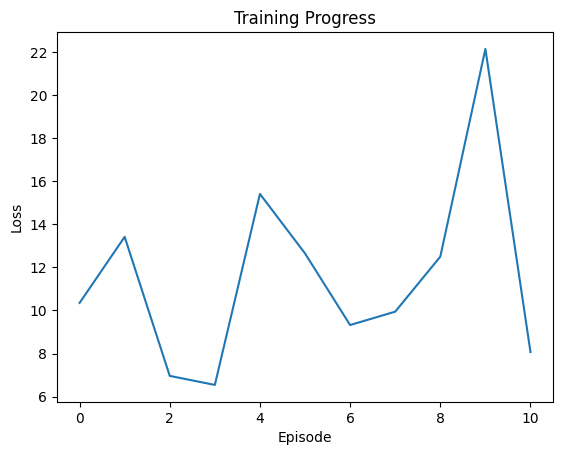

Episode: 14  Score: 0


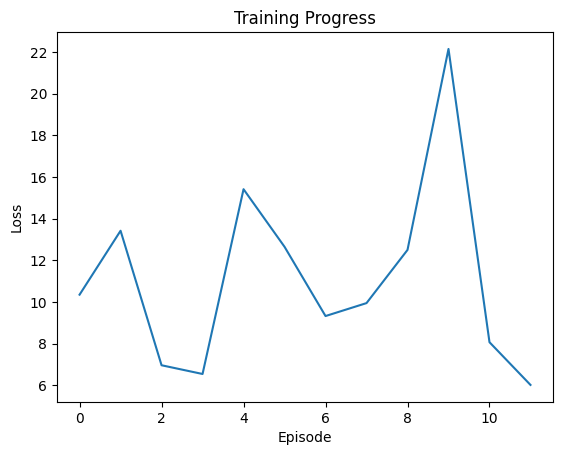

Episode: 15  Score: 0


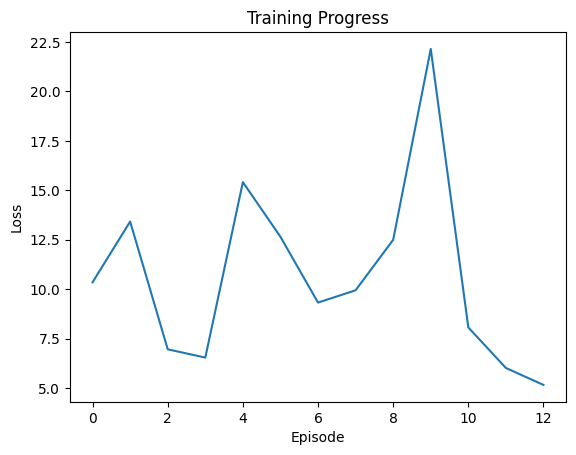

Episode: 16  Score: 0


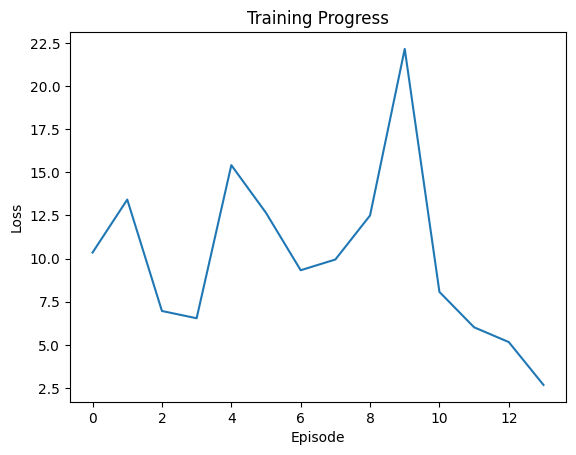

Episode: 17  Score: 0


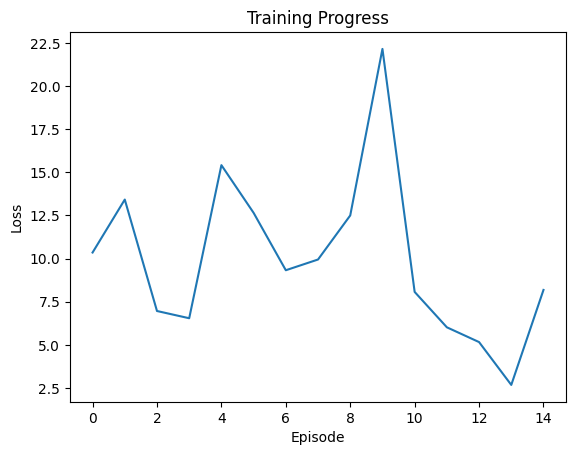

Episode: 18  Score: 0


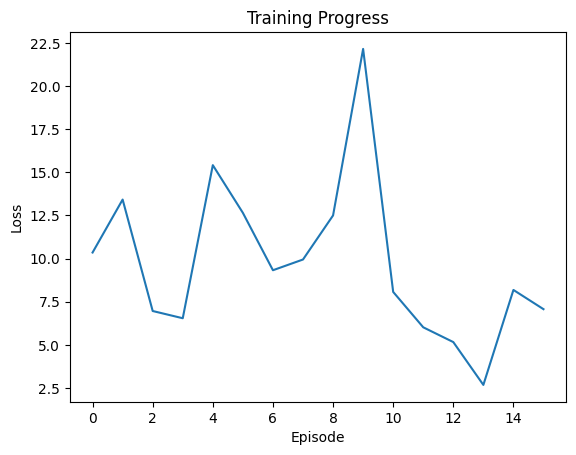

Episode: 19  Score: 0


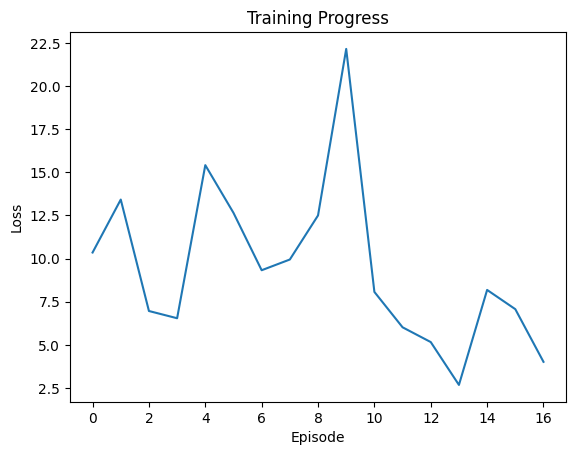

Episode: 20  Score: 0


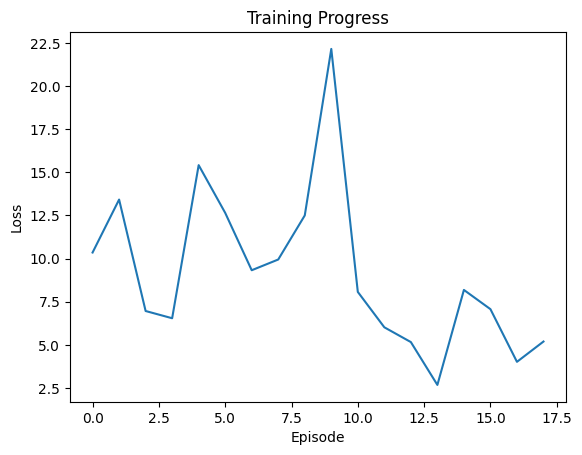

Episode: 21  Score: 0


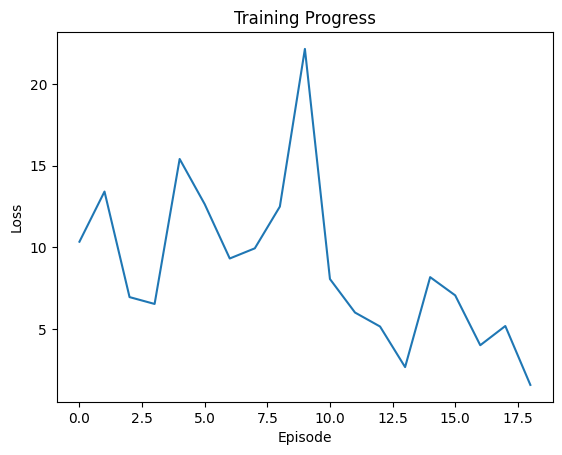

Episode: 22  Score: 0


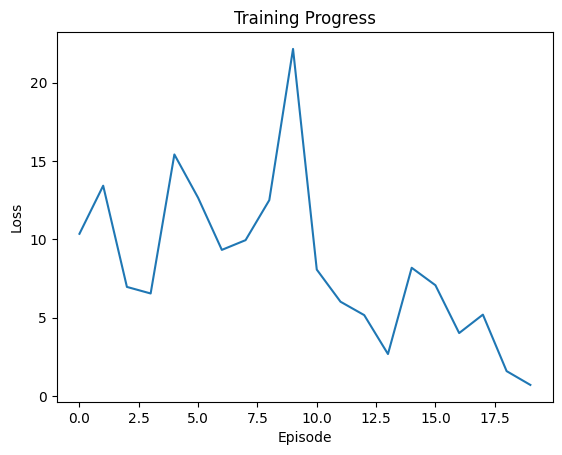

KeyboardInterrupt: 

In [4]:
import pygame
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 게임 초기화
pygame.init()
screen_width, screen_height = 640, 480
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Snakegame with DQN by SJW')
clock = pygame.time.Clock()

# 색깔 정의
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
WHITE = (255, 255, 255)

# 게임 환경 변수
grid_size = 20
grid_width = screen_width // grid_size
grid_height = screen_height // grid_size

# DQN 관련 변수
state_size = grid_width * grid_height
action_size = 4  # 상(0), 하(1), 좌(2), 우(3)
batch_size = 32
memory_size = 1000

# DQN 신경망 모델
class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DQN()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# Replay Memory
memory = []

# Snake 클래스 정의
class Snake:
    def __init__(self):
        self.x = random.randint(1, grid_width - 2)
        self.y = random.randint(1, grid_height - 2)
        self.direction = random.choice(['UP', 'DOWN', 'LEFT', 'RIGHT'])
        self.body = [(self.x, self.y)]

    def move(self):
        if self.direction == "RIGHT":
            self.x += 1
        elif self.direction == "LEFT":
            self.x -= 1
        elif self.direction == "UP":
            self.y -= 1
        elif self.direction == "DOWN":
            self.y += 1

        # 현재 머리의 좌표를 저장
        head = (self.x, self.y)

        # 머리를 이동시킨 후, 몸통의 좌표 업데이트
        self.body.insert(0, head)
        self.body.pop()

        
    def change_direction(self, new_direction):
        if new_direction == 'UP' and self.direction != 'DOWN':
            self.direction = new_direction
        elif new_direction == 'DOWN' and self.direction != 'UP':
            self.direction = new_direction
        elif new_direction == 'LEFT' and self.direction != 'RIGHT':
            self.direction = new_direction
        elif new_direction == 'RIGHT' and self.direction != 'LEFT':
            self.direction = new_direction

    def draw(self):
        for segment in self.body:
            pygame.draw.rect(screen, GREEN, (segment[0] * grid_size, segment[1] * grid_size, grid_size, grid_size))

# Apple 클래스 정의
class Apple:
    def __init__(self):
        self.x = random.randrange(0, screen_width,10) 
        self.y = random.randrange(0, screen_height,10) 

    def draw(self):
        pygame.draw.rect(screen, RED, (self.x * grid_size, self.y * grid_size, grid_size, grid_size))

# 게임 초기화
def initialize_game():
    snake = Snake()
    apple = Apple()
    return snake, apple

# 상태를 픽셀 그리드로 변환
def get_state(snake, apple):
    state = np.zeros((grid_width, grid_height))
    for segment in snake.body:
        x, y = segment[0], segment[1]
        if x < grid_width and y < grid_height:
            state[x, y] = 1
    if apple.x < grid_width and apple.y < grid_height:
        state[apple.x, apple.y] = 2
    return state.flatten()


# DQN 모델로 행동 선택
def select_action(state):
    state_tensor = torch.tensor(state, dtype=torch.float).unsqueeze(0)
    q_values = model(state_tensor)
    action = torch.argmax(q_values, dim=1).item()
    return action

# 게임 종료 여부 확인
def is_game_over(snake):
    if snake.x < 0 or snake.x >= grid_width or snake.y < 0 or snake.y >= grid_height:
        return True
    if (snake.x, snake.y) in snake.body[1:]:
        return True
    return False

# 게임 진행
def play_game():
    global loss
    snake, apple = initialize_game()
    done = False
    score = 0
    while not done:
        state = get_state(snake, apple)
        action = select_action(state)
        snake.change_direction(['UP', 'DOWN', 'LEFT', 'RIGHT'][action])
        snake.move()
        if is_game_over(snake):
            done = True
            reward = -10
        elif snake.x == apple.x and snake.y == apple.y:
            snake.body.append((apple.x, apple.y))
            apple = Apple()
            score += 1
            reward = 10
        else:
            reward = -1
        next_state = get_state(snake, apple)
        memory.append((state, action, reward, next_state, done))

        # Replay Memory 크기 제한
        if len(memory) > memory_size:
            memory.pop(0)

        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)

            states_tensor = torch.tensor(states, dtype=torch.float)
            actions_tensor = torch.tensor(actions, dtype=torch.long).unsqueeze(1)
            rewards_tensor = torch.tensor(rewards, dtype=torch.float)
            next_states_tensor = torch.tensor(next_states, dtype=torch.float)
            dones_tensor = torch.tensor(dones, dtype=torch.float)

            q_values = model(states_tensor)
            next_q_values = model(next_states_tensor)

            q_targets = rewards_tensor + 0.99 * torch.max(next_q_values, dim=1)[0] * (1 - dones_tensor)
            q_targets = q_targets.unsqueeze(1)

            q_values = torch.gather(q_values, 1, actions_tensor)
            loss = loss_fn(q_values, q_targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        screen.fill(BLACK)
        snake.draw()
        apple.draw()
        pygame.display.flip()
        clock.tick(10)

    return score
# 학습 진행 상황을 기록하기 위한 리스트
losses = []
# 전역 변수로 loss 선언
loss = None

# 학습
num_episodes = 1000
for episode in range(num_episodes):
    score = play_game()
    print(f"Episode: {episode + 1}  Score: {score}")

    # 매 에피소드마다 loss 값을 기록
    if loss is not None:
        losses.append(loss.item())

    # 그래프 그리기
    plt.plot(losses)
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.title('Training Progress')
    plt.pause(0.001)



plt.show()

pygame.quit()


In [1]:
import pygame
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 게임 초기화
pygame.init()
screen_width, screen_height = 640, 480
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Snakegame with DQN by SJW')
clock = pygame.time.Clock()

# 색깔 정의
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
WHITE = (255, 255, 255)

# 게임 환경 변수
grid_size = 20
grid_width = screen_width // grid_size
grid_height = screen_height // grid_size

# DQN 관련 변수
state_size = grid_width * grid_height
action_size = 4  # 상(0), 하(1), 좌(2), 우(3)
batch_size = 32
memory_size = 1000
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
target_update_freq = 10  # Update target network every n episodes

# DQN 신경망 모델
class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DQN()
target_model = DQN()
target_model.load_state_dict(model.state_dict())  # Initialize target model with main model weights
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# Replay Memory
memory = []

# Snake 클래스 정의
class Snake:
    def __init__(self):
        self.x = random.randint(1, grid_width - 2)
        self.y = random.randint(1, grid_height - 2)
        self.direction = random.choice(['UP', 'DOWN', 'LEFT', 'RIGHT'])
        self.body = [(self.x, self.y)]

    def move(self):
        if self.direction == "RIGHT":
            self.x += 1
        elif self.direction == "LEFT":
            self.x -= 1
        elif self.direction == "UP":
            self.y -= 1
        elif self.direction == "DOWN":
            self.y += 1

        # 현재 머리의 좌표를 저장
        head = (self.x, self.y)

        # 머리를 이동시킨 후, 몸통의 좌표 업데이트
        self.body.insert(0, head)
        self.body.pop()

        
    def change_direction(self, new_direction):
        if new_direction == 'UP' and self.direction != 'DOWN':
            self.direction = new_direction
        elif new_direction == 'DOWN' and self.direction != 'UP':
            self.direction = new_direction
        elif new_direction == 'LEFT' and self.direction != 'RIGHT':
            self.direction = new_direction
        elif new_direction == 'RIGHT' and self.direction != 'LEFT':
            self.direction = new_direction

    def draw(self):
        for segment in self.body:
            pygame.draw.rect(screen, GREEN, (segment[0] * grid_size, segment[1] * grid_size, grid_size, grid_size))

# Apple 클래스 정의
class Apple:
    def __init__(self):
        self.x = random.randrange(0, screen_width, 10) 
        self.y = random.randrange(0, screen_height, 10) 

    def draw(self):
        pygame.draw.rect(screen, RED, (self.x * grid_size, self.y * grid_size, grid_size, grid_size))

# 게임 초기화
def initialize_game():
    snake = Snake()
    apple = Apple()
    return snake, apple

# 상태를 픽셀 그리드로 변환
def get_state(snake, apple):
    state = np.zeros((grid_width, grid_height))
    for segment in snake.body:
        x, y = segment[0], segment[1]
        if x < grid_width and y < grid_height:
            state[x, y] = 1
    if apple.x < grid_width and apple.y < grid_height:
        state[apple.x, apple.y] = 2
    return state.flatten()


# DQN 모델로 행동 선택
def select_action(state):
    if random.random() < epsilon:
        action = random.randint(0, action_size - 1)
    else:
        state_tensor = torch.tensor(state, dtype=torch.float).unsqueeze(0)
        q_values = model(state_tensor)
        action = torch.argmax(q_values, dim=1).item()
    return action

# 게임 종료 여부 확인
def is_game_over(snake):
    if snake.x < 0 or snake.x >= grid_width or snake.y < 0 or snake.y >= grid_height:
        return True
    if (snake.x, snake.y) in snake.body[1:]:
        return True
    return False

# 게임 진행
def play_game():
    global epsilon, loss
    snake, apple = initialize_game()
    done = False
    score = 0
    while not done:
        state = get_state(snake, apple)
        action = select_action(state)
        snake.change_direction(['UP', 'DOWN', 'LEFT', 'RIGHT'][action])
        snake.move()
        if is_game_over(snake):
            done = True
            reward = -10
        elif snake.x == apple.x and snake.y == apple.y:
            snake.body.append((apple.x, apple.y))
            apple = Apple()
            score += 1
            reward = 10
        else:
            reward = -1
        next_state = get_state(snake, apple)
        memory.append((state, action, reward, next_state, done))

        # Replay Memory 크기 제한
        if len(memory) > memory_size:
            memory.pop(0)

        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)

            states_tensor = torch.tensor(states, dtype=torch.float)
            actions_tensor = torch.tensor(actions, dtype=torch.long).unsqueeze(1)
            rewards_tensor = torch.tensor(rewards, dtype=torch.float)
            next_states_tensor = torch.tensor(next_states, dtype=torch.float)
            dones_tensor = torch.tensor(dones, dtype=torch.float)

            states_tensor = states_tensor.to(device)
            actions_tensor = actions_tensor.to(device)
            rewards_tensor = rewards_tensor.to(device)
            next_states_tensor = next_states_tensor.to(device)
            dones_tensor = dones_tensor.to(device)

            q_values = model(states_tensor)
            next_q_values = target_model(next_states_tensor)

            q_targets = rewards_tensor + 0.99 * torch.max(next_q_values, dim=1)[0] * (1 - dones_tensor)
            q_targets = q_targets.unsqueeze(1)

            q_values = torch.gather(q_values, 1, actions_tensor)
            loss = loss_fn(q_values, q_targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        screen.fill(BLACK)
        snake.draw()
        apple.draw()
        pygame.display.flip()
        clock.tick(10)

    return score

# 학습 진행 상황을 기록하기 위한 리스트
losses = []
# 전역 변수로 loss 선언
loss = None

# 학습
num_episodes = 1000
for episode in range(num_episodes):
    score = play_game()
    print(f"Episode: {episode + 1}  Score: {score}")

    # 매 에피소드마다 loss 값을 기록
    if loss is not None:
        losses.append(loss.item())

    # 타겟 네트워크 업데이트
    if episode % target_update_freq == 0:
        target_model.load_state_dict(model.state_dict())

    # 탐험 비율 감소
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    # 그래프 그리기
    plt.plot(losses)
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.title('DQN Training')
    plt.show()


ModuleNotFoundError: No module named 'pygame'

In [6]:
pygame.quit()